# MULTIPLE LINEAR REGRESSION

# Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [39]:
# ------------------------------------------------------------
# 1. LOAD THE DATA
# ------------------------------------------------------------
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [40]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [42]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [43]:
# ------------------------------------------------------------
# DATA PREPROCESSING
# ------------------------------------------------------------
# Convert categorical variable FuelType into dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [44]:

X_vars = df[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight']]

y = df['Price']

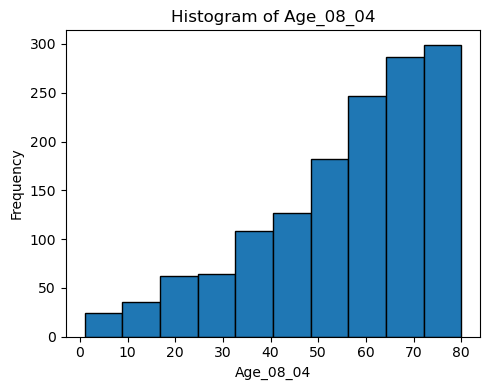

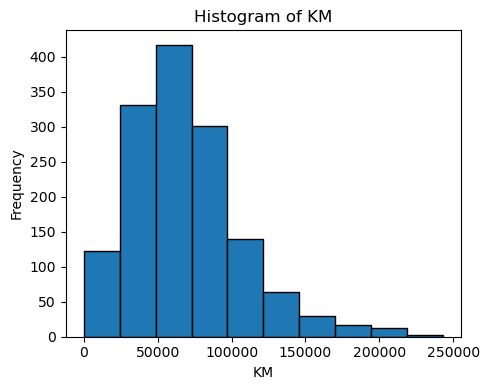

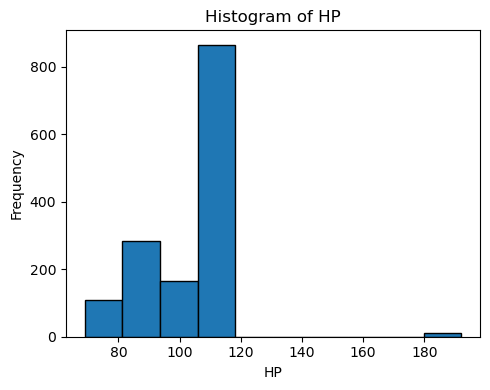

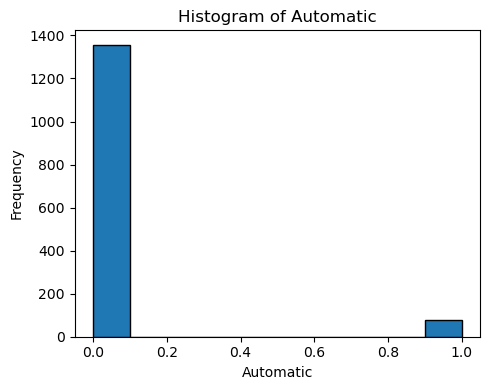

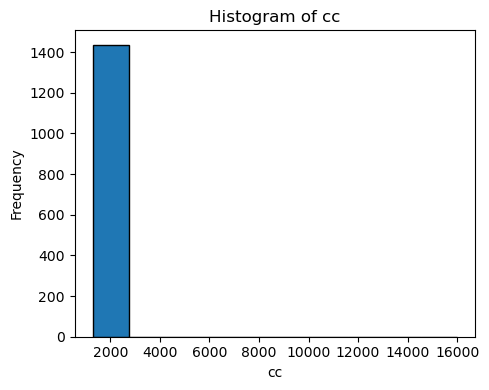

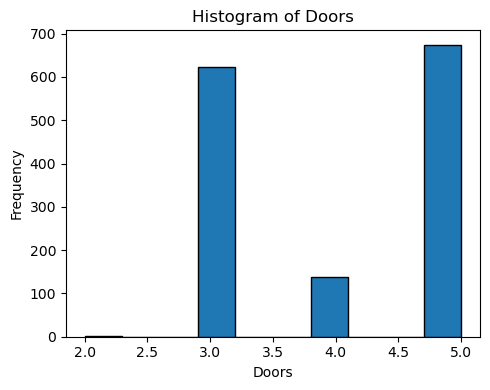

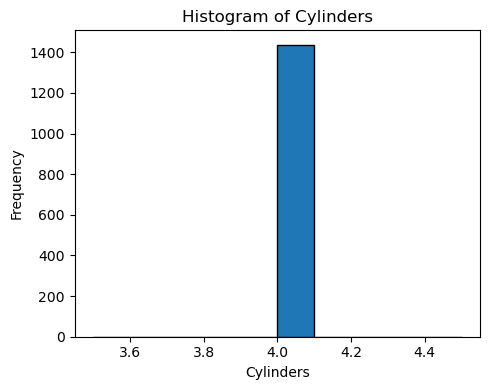

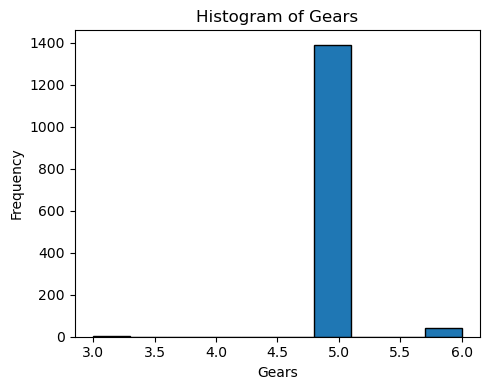

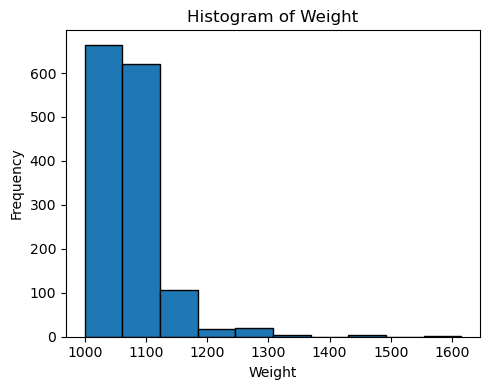

In [45]:
# ---------------------------------------------------
#  HISTOGRAMS 
# ---------------------------------------------------
for col in X_vars.columns:
    plt.figure(figsize=(5, 4))        # create new figure for each plot
    plt.hist(X_vars[col], edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

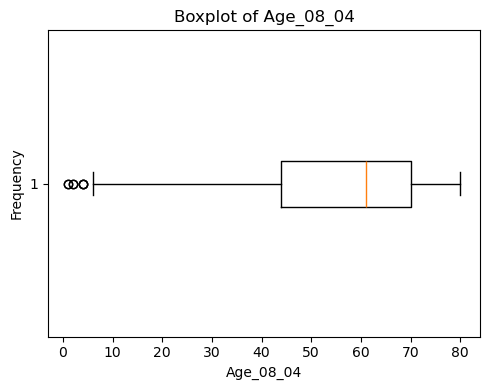

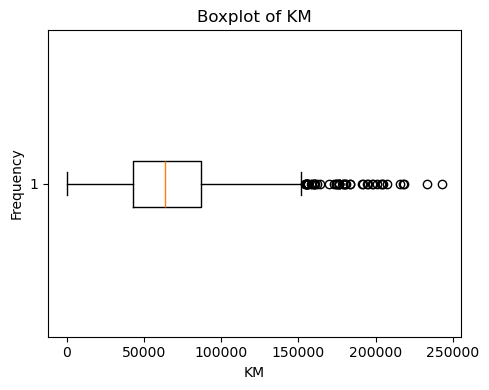

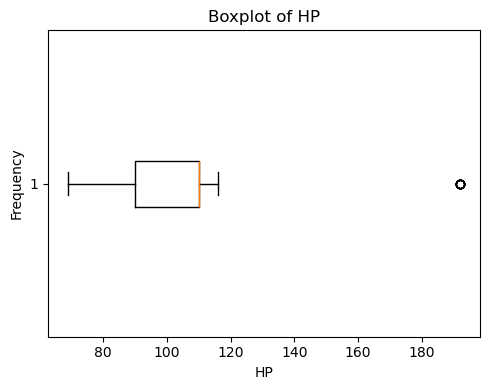

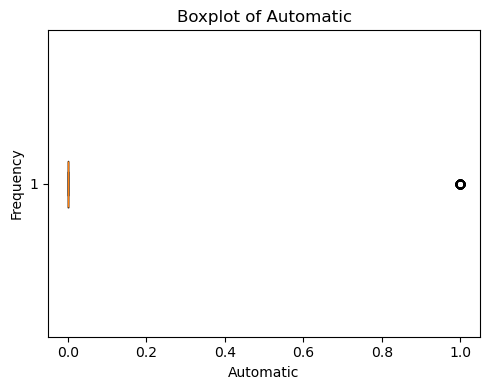

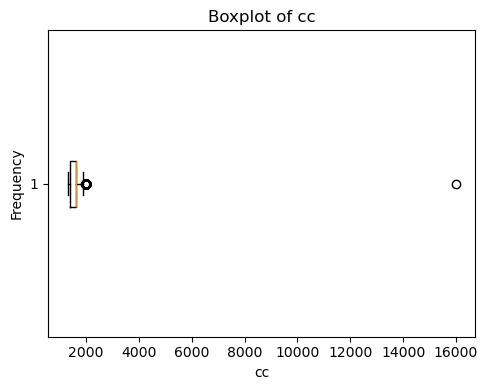

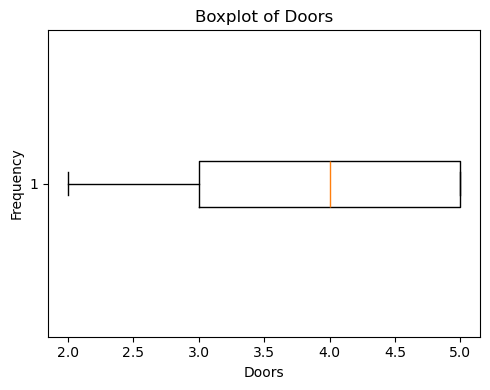

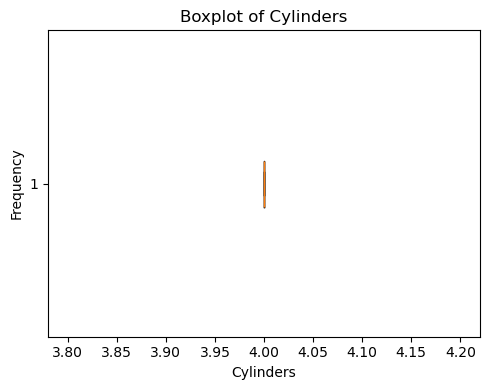

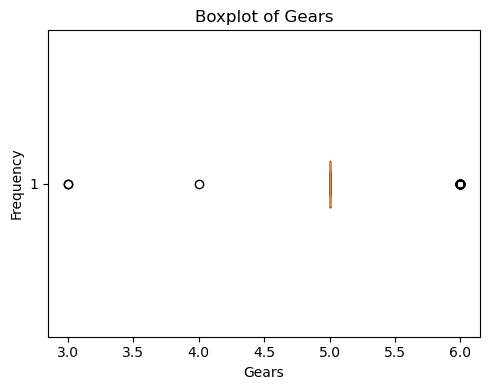

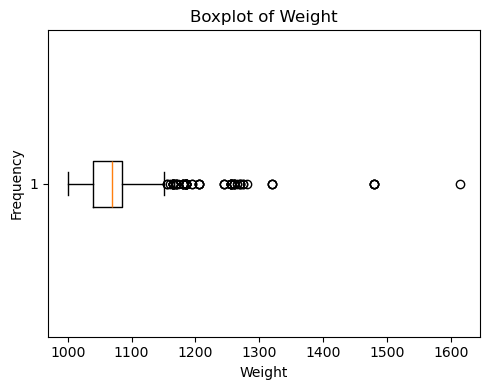

In [84]:
# ---------------------------------------------------
#  BOXPLOT 
# ---------------------------------------------------
for col in X_vars.columns:
    plt.figure(figsize=(5, 4))        # create new figure for each plot
    plt.boxplot(X_vars[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

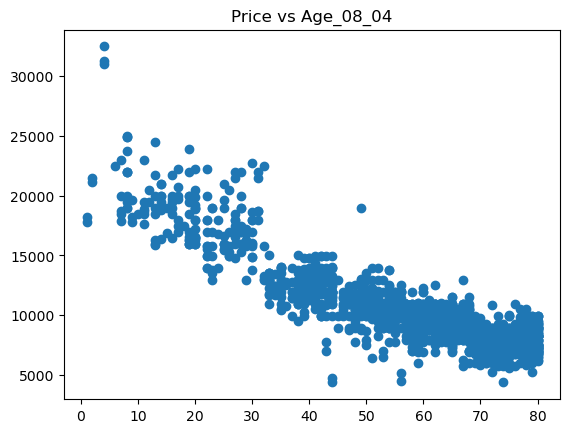

<Figure size 400x400 with 0 Axes>

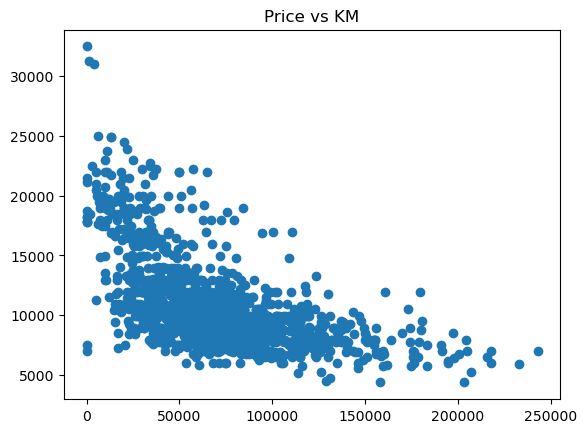

<Figure size 400x400 with 0 Axes>

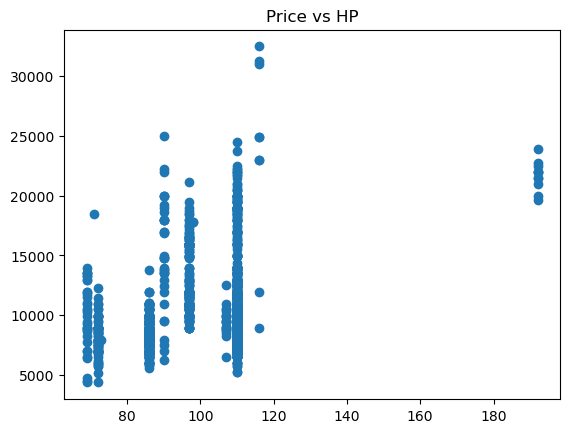

<Figure size 400x400 with 0 Axes>

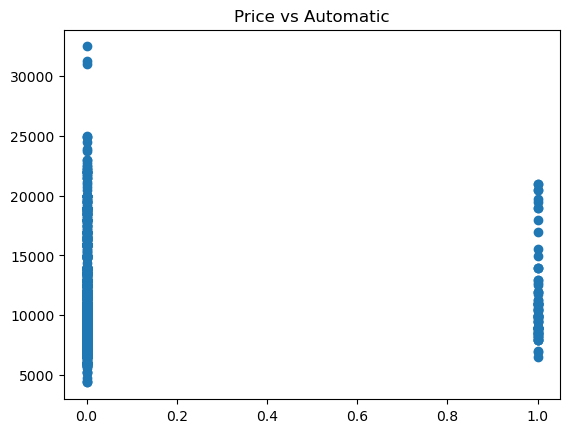

<Figure size 400x400 with 0 Axes>

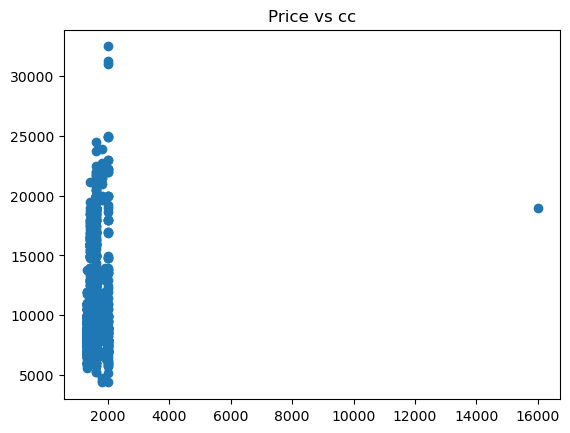

<Figure size 400x400 with 0 Axes>

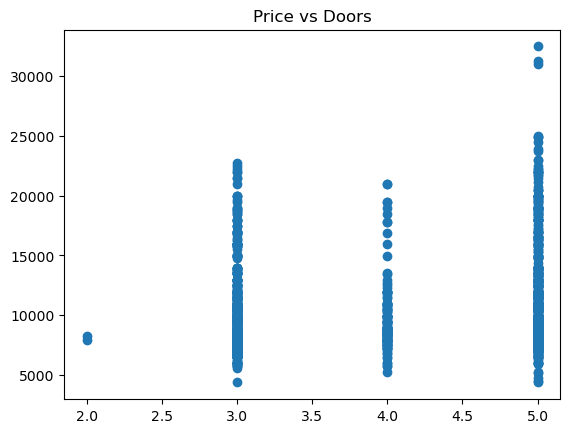

<Figure size 400x400 with 0 Axes>

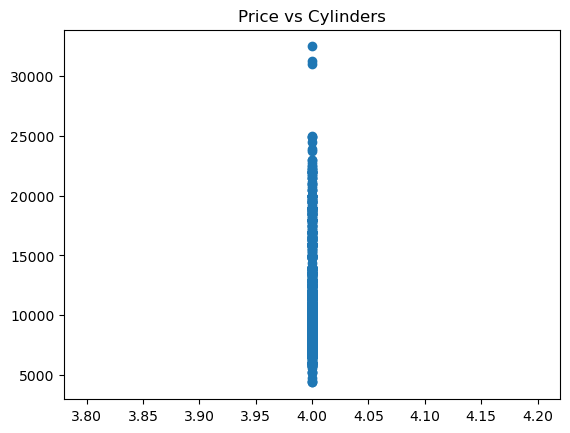

<Figure size 400x400 with 0 Axes>

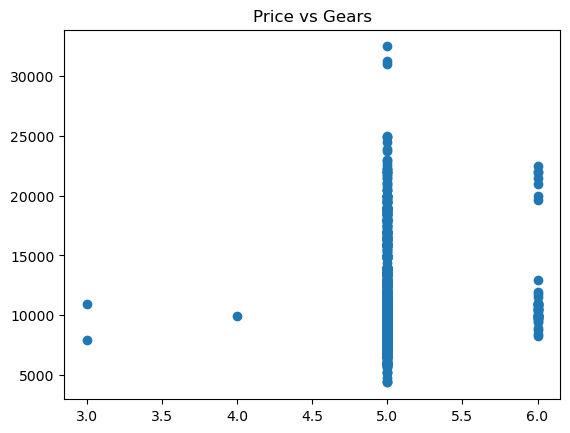

<Figure size 400x400 with 0 Axes>

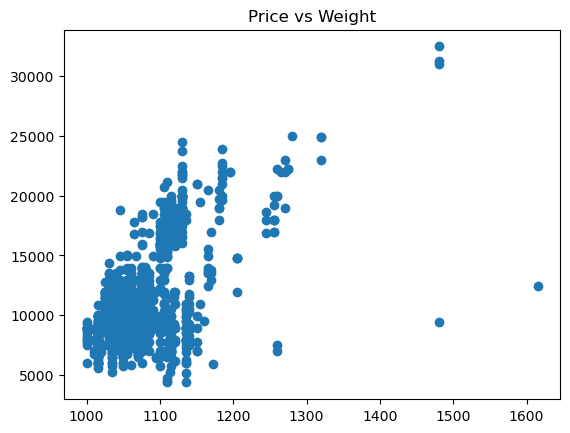

<Figure size 400x400 with 0 Axes>

In [50]:
# ---------------------------------------------------
#  SCATTER PLOT
# ---------------------------------------------------
for col in X_vars:
    plt.scatter(X_vars[col],df["Price"])
    plt.title(f"Price vs {col}")
    plt.figure(figsize=(4,4))
    plt.show()

In [55]:
X = df[['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight',
        'Fuel_Type_Diesel','Fuel_Type_Petrol']]

y = df['Price']

In [56]:
X

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,True,False
1,23,72937,90,0,2000,3,4,5,1165,True,False
2,24,41711,90,0,2000,3,4,5,1165,True,False
3,26,48000,90,0,2000,3,4,5,1165,True,False
4,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,False,True
1432,72,19000,86,0,1300,3,4,5,1015,False,True
1433,71,17016,86,0,1300,3,4,5,1015,False,True
1434,70,16916,86,0,1300,3,4,5,1015,False,True


In [57]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [58]:
# ------------------------------------------------------------
# TRAIN-TEST SPLIT (80% - 20%)
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


In [59]:
# ------------------------------------------------------------
# STANDARDIZATION (Recommended for Lasso and Ridge)
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [60]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.568087,-0.560470


In [71]:
# Model A: 2 variables
X_A = df[['Age_08_04', 'KM']]
y = df['Price']
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y, test_size=0.20, random_state=42)

model_A = LinearRegression()
model_A.fit(X_train_A, y_train_A)
df["Y_pred"] = model_A.predict(X_A)
mse = mean_squared_error(y,df["Y_pred"])
print("Mean squared error: ", np.round(mse,3))

rmse = root_mean_squared_error(y,df["Y_pred"])
print("Root Mean squared error: ", np.round(rmse,3))

score = r2_score(y,df["Y_pred"])
print("R2 square: ", np.round(score,3))



Mean squared error:  2761877.702
Root Mean squared error:  1661.89
R2 square:  0.79


In [74]:
# Model B: 3 variables
X_B = df[['Age_08_04', 'KM', 'Weight']]
y = df['Price']
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y, test_size=0.20, random_state=42)

model_B = LinearRegression()
model_B.fit(X_train_B, y_train_B)
df["Y_pred"] = model_B.predict(X_B)
mse = mean_squared_error(y,df["Y_pred"])
print("Mean squared error: ", np.round(mse,3))

rmse = root_mean_squared_error(y,df["Y_pred"])
print("Root Mean squared error: ", np.round(rmse,3))

score = r2_score(y,df["Y_pred"])
print("R2 square: ", np.round(score,3))



Mean squared error:  1999165.257
Root Mean squared error:  1413.918
R2 square:  0.848


In [76]:
# Model C: 4 variables
X_C = df[['Age_08_04', 'KM', 'HP', 'Weight']]
y = df['Price']
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y, test_size=0.20, random_state=42)

model_C = LinearRegression()
model_C.fit(X_train_C, y_train_C)
df["Y_pred"] = model_C.predict(X_C)
mse = mean_squared_error(y,df["Y_pred"])
print("Mean squared error: ", np.round(mse,3))

rmse = root_mean_squared_error(y,df["Y_pred"])
print("Root Mean squared error: ", np.round(rmse,3))

score = r2_score(y,df["Y_pred"])
print("R2 square: ", np.round(score,3))


Mean squared error:  1820378.984
Root Mean squared error:  1349.214
R2 square:  0.862


In [80]:
# Model D: Full model (all variables)

model_D = LinearRegression()
model_D.fit(X_train, y_train)
df["Y_pred"] = model_D.predict(X)
mse = mean_squared_error(y,df["Y_pred"])
print("Mean squared error: ", np.round(mse,3))

rmse = root_mean_squared_error(y,df["Y_pred"])
print("Root Mean squared error: ", np.round(rmse,3))

score = r2_score(y,df["Y_pred"])
print("R2 square: ", np.round(score,3))

Mean squared error:  1799845.076
Root Mean squared error:  1341.583
R2 square:  0.863


### 5.Apply Lasso and Ridge methods on the model.

In [83]:
# -----------------------------------------
# LASSO REGRESSION
# -----------------------------------------
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

lasso_preds = lasso.predict(X_test_scaled)

print("\nLASSO REGRESSION RESULTS")
print("------------------------------")
print("Coefficients:\n", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_preds)))
print("R² Score:", r2_score(y_test, lasso_preds))


# -----------------------------------------
# RIDGE REGRESSION
# -----------------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

ridge_preds = ridge.predict(X_test_scaled)

print("\nRIDGE REGRESSION RESULTS")
print("------------------------------")
print("Coefficients:\n", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_preds)))
print("R² Score:", r2_score(y_test, ridge_preds))


LASSO REGRESSION RESULTS
------------------------------
Coefficients:
 [-2267.27035325  -611.71048543   208.46018035    34.33563064
   -14.04428476   -57.28823708     0.           109.26803766
  1316.40520977   -21.48431939   457.89124117]
Intercept: 10754.395470383277
RMSE: 1484.1628889184242
R² Score: 0.8349116135580271

RIDGE REGRESSION RESULTS
------------------------------
Coefficients:
 [-2265.00134477  -613.35953393   209.51163834    34.5626656
   -14.01720176   -56.6392258      0.           109.44104993
  1314.4755365    -22.63285265   453.92669153]
Intercept: 10754.395470383277
RMSE: 1483.557506308162
R² Score: 0.8350462635431566


### Model A
Model A uses the basic set of predictor variables.
It performs moderately well with an R² value of 0.79, meaning it explains 79% of the variation in car prices.
However, the RMSE of 1661.89 shows that the predictions are not very close to actual prices.
This indicates that the model is missing some important variables that influence the price.

### Model B

Model B includes additional relevant variables compared to Model A.
Its performance improves significantly with an R² of 0.848, meaning it explains 84.8% of price variation.
The RMSE also drops to 1413.92, showing more accurate predictions.
Adding more informative features strengthens the model’s predictive ability.

### Model C

Model C uses a refined set of variables, removing less useful predictors and keeping the strongest ones.
This results in even better performance: R² increases to 0.862, and RMSE decreases to 1349.21.
This model balances the number of predictors and their usefulness effectively, leading to strong performance.

### Model D

Model D provides the best performance among all four models.
With an R² of 0.863 and the lowest RMSE of 1341.58, it captures the highest amount of variation in car prices and gives the most accurate predictions.
However, the improvement over Model C is small, indicating that Model C already captures most of the important information.

### Summary

As we progressed from Model A → D, the models improved by adding or selecting better predictors.
Model D performs the best, but Model C offers nearly the same accuracy with fewer variables, making it efficient and reliable.

## Interview Questions:

### 1.What is Normalization & Standardization and how is it helpful?

---Normalization scales values to a fixed range,usually 0 to 1.
---Standardization transforms data so it has mean=0,standard deviation=1.
---Prevents features with large values from dominating the model
---Improves performance of regualrized models

### 2.What techniques can be used to address multicollinearity in multiple linear regression?
1.Remove highly correlated variables
2.Use Regularized Techniques
3.Principal Component Analysis
4.Variation Inflation Factor
